In [2]:
from matplotlib.animation import FuncAnimation


<ipython-input-11-0cfa38a145c9>:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  electron.set_data(x, y)
<ipython-input-11-0cfa38a145c9>:71: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  electron.set_data(x, y)


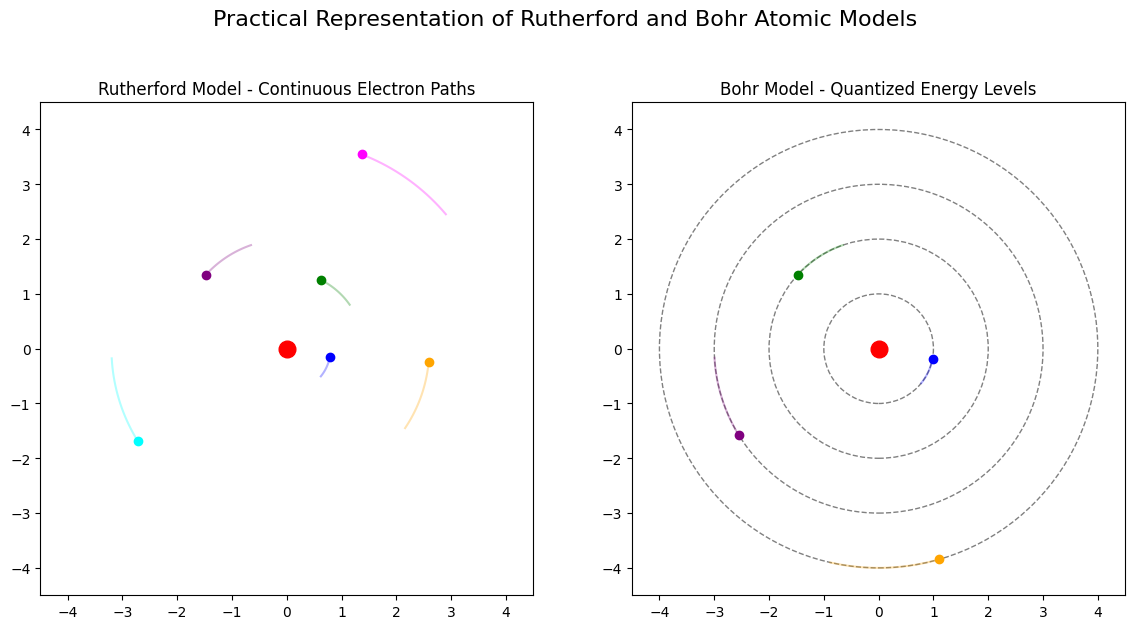

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
num_electrons_rutherford = 6  # Number of electrons for Rutherford model
num_electrons_bohr = 4  # Number of electrons for Bohr model (in different orbits)
rutherford_radii = [0.8, 1.4, 2.0, 2.6, 3.2, 3.8]  # Radii for Rutherford's orbits
bohr_radii = [1.0, 2.0, 3.0, 4.0]  # Radii for Bohr's quantized energy levels
electron_speeds_rutherford = [0.05, 0.04, 0.03, 0.025, 0.02, 0.015]  # Speeds for Rutherford's electrons
electron_speeds_bohr = [0.05, 0.03, 0.02, 0.01]  # Speeds for Bohr's electrons
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta']  # Colors for electrons

# Initialize figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle("Practical Representation of Rutherford and Bohr Atomic Models", fontsize=16)

# Rutherford model (left subplot)
ax1.set_aspect('equal')
ax1.set_xlim(-4.5, 4.5)
ax1.set_ylim(-4.5, 4.5)
ax1.set_title("Rutherford Model - Continuous Electron Paths")
nucleus_rutherford, = ax1.plot(0, 0, 'o', color='red', markersize=12, label="Nucleus")
rutherford_electrons = [ax1.plot([], [], 'o', color=colors[i % len(colors)])[0] for i in range(num_electrons_rutherford)]
rutherford_trails = [ax1.plot([], [], '-', color=colors[i % len(colors)], alpha=0.3)[0] for i in range(num_electrons_rutherford)]

# Bohr model (right subplot)
ax2.set_aspect('equal')
ax2.set_xlim(-4.5, 4.5)
ax2.set_ylim(-4.5, 4.5)
ax2.set_title("Bohr Model - Quantized Energy Levels")
nucleus_bohr, = ax2.plot(0, 0, 'o', color='red', markersize=12, label="Nucleus")
bohr_orbits = [plt.Circle((0, 0), radius, color='gray', linestyle='dashed', fill=False) for radius in bohr_radii]
for orbit in bohr_orbits:
    ax2.add_patch(orbit)
bohr_electrons = [ax2.plot([], [], 'o', color=colors[i % len(colors)])[0] for i in range(num_electrons_bohr)]
bohr_trails = [ax2.plot([], [], '-', color=colors[i % len(colors)], alpha=0.3)[0] for i in range(num_electrons_bohr)]

# Initialization function
def init():
    for electron, trail in zip(rutherford_electrons + bohr_electrons, rutherford_trails + bohr_trails):
        electron.set_data([], [])
        trail.set_data([], [])
    return rutherford_electrons + bohr_electrons + rutherford_trails + bohr_trails

# Update function for both models
def update(frame):
    # Update Rutherford model: electrons move in free paths
    for i, (electron, trail) in enumerate(zip(rutherford_electrons, rutherford_trails)):
        angle = frame * electron_speeds_rutherford[i]
        x = rutherford_radii[i] * np.cos(angle)
        y = rutherford_radii[i] * np.sin(angle)
        electron.set_data(x, y)
        x_trail = rutherford_radii[i] * np.cos(np.linspace(angle - 0.5, angle, 20))
        y_trail = rutherford_radii[i] * np.sin(np.linspace(angle - 0.5, angle, 20))
        trail.set_data(x_trail, y_trail)

    # Update Bohr model: electrons move in quantized orbits with potential "jumps"
    for i, (electron, trail) in enumerate(zip(bohr_electrons, bohr_trails)):
        angle = frame * electron_speeds_bohr[i]
        radius = bohr_radii[i]

        # Introduce occasional orbit changes to simulate "quantum jumps"
        if frame % 300 < 50 and i == 0:
            radius = bohr_radii[(i + 1) % len(bohr_radii)]  # Example of a jump for the first electron
        elif frame % 300 >= 50 and i == 0:
            radius = bohr_radii[0]  # Return to original orbit

        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        electron.set_data(x, y)
        x_trail = radius * np.cos(np.linspace(angle - 0.5, angle, 20))
        y_trail = radius * np.sin(np.linspace(angle - 0.5, angle, 20))
        trail.set_data(x_trail, y_trail)

    return rutherford_electrons + bohr_electrons + rutherford_trails + bohr_trails

# Create animation
ani = FuncAnimation(fig, update, frames=500, init_func=init, blit=True, interval=50)

# Save animation as video or display
ani.save("practical_rutherford_vs_bohr.mp4", writer="ffmpeg", dpi=150)
plt.show()

